In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [3]:
aq = pd.read_csv('aq_filled.csv', parse_dates=[0], index_col=0)
wind = pd.read_csv('wind.csv', parse_dates=[0], index_col=0)

In [4]:
df = pd.concat([aq, wind],axis=1, join='inner')
df

,NO2 (ppb),O3 (ppb),Humidity (%),Temp (C),windspeed,direction
2022-05-13 12:00:00,15.67,43.97,43.93,27.63,1.46,68.00
2022-05-13 13:00:00,13.77,46.23,37.98,27.63,2.98,72.62
2022-05-13 14:00:00,13.21,48.69,38.15,27.40,5.81,71.18
2022-05-13 15:00:00,15.30,49.38,38.43,27.23,6.98,57.97
2022-05-13 16:00:00,16.49,49.66,37.83,26.78,6.23,56.73
...,...,...,...,...,...,...
2022-07-29 03:00:00,31.88,22.32,61.45,26.43,0.95,188.67
2022-07-29 04:00:00,41.92,22.99,62.18,26.13,0.69,264.97
2022-07-29 05:00:00,58.15,15.42,62.03,26.90,0.42,276.30
2022-07-29 06:00:00,31.94,25.96,57.63,29.35,0.73,258.35


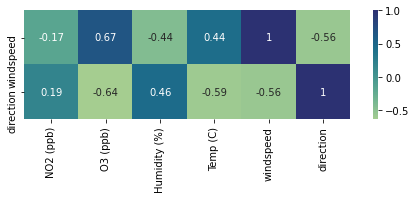

In [5]:
plt.figure(figsize=(8,2))
sns.heatmap(df.corr()[['windspeed','direction']].T,cmap='crest', annot=True, square=True)
plt.show()

#### Δεν υφίσταται συσχέτιση κατεύθυνσης σε μοίρες.

In [6]:
bins = bins = np.linspace(0,360,9)+22.5
bins = np.insert(bins,0,0)
labels = ["N","NE","E","SE","S","SW","W","NW","N2"]

In [7]:
df['wind direction'] = pd.cut(df.direction, bins=bins, labels=labels, include_lowest=True)
df['wind direction'] = df['wind direction'].replace('N2','N')
df.head()

,NO2 (ppb),O3 (ppb),Humidity (%),Temp (C),windspeed,direction,wind direction
2022-05-13 12:00:00,15.67,43.97,43.93,27.63,1.46,68.00,E
2022-05-13 13:00:00,13.77,46.23,37.98,27.63,2.98,72.62,E
2022-05-13 14:00:00,13.21,48.69,38.15,27.40,5.81,71.18,E
2022-05-13 15:00:00,15.30,49.38,38.43,27.23,6.98,57.97,NE
2022-05-13 16:00:00,16.49,49.66,37.83,26.78,6.23,56.73,NE


In [8]:
df['wind direction']=df['wind direction'].astype('string')
df.loc[df['windspeed']<0.5,'wind direction'] = 'CALM'

In [9]:
df.to_csv('aq_wind.csv')